In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Load Dataset
file_path = r"default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)   # header=1 skips first row

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month

In [3]:
# Rename target column
df.rename(columns={"default payment next month": "default"}, inplace=True)

In [4]:
# Preprocessing
# Separate features & target
X = df.drop("default", axis=1)
y = df["default"]

# Encode categorical features
cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

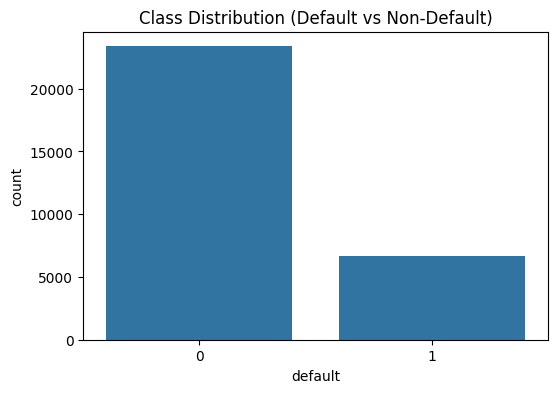

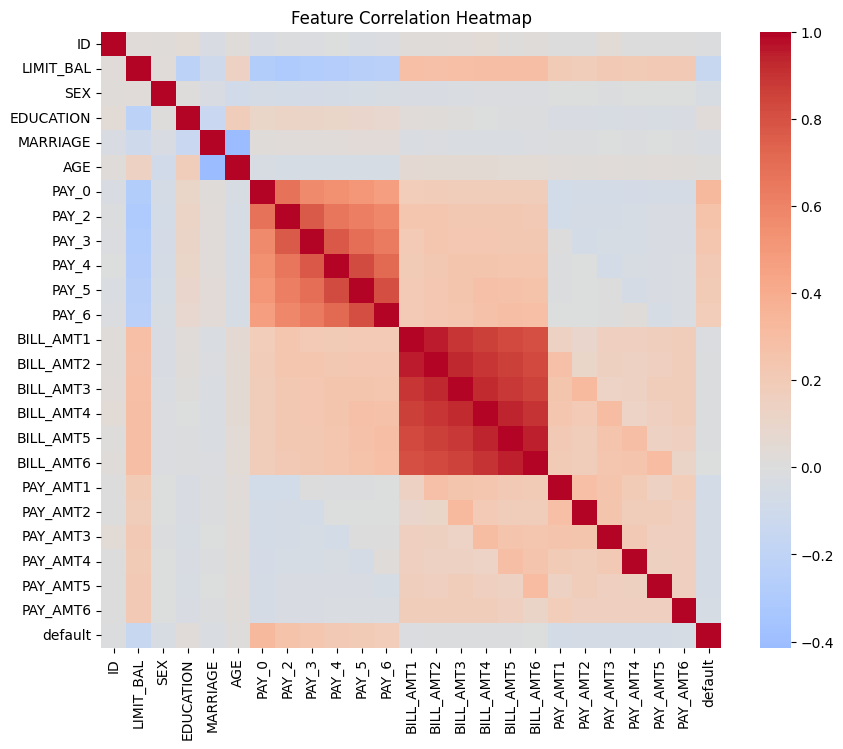

In [5]:
# Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x="default", data=df)
plt.title("Class Distribution (Default vs Non-Default)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


===== Logistic Regression =====
Accuracy: 0.8085
Confusion Matrix:
 [[4530  143]
 [1006  321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


===== kNN =====
Accuracy: 0.7935
Confusion Matrix:
 [[4301  372]
 [ 867  460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.35      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.78      6000


===== SVM =====
Accuracy: 0.8161666666666667
Confusion Matrix:
 [[4449  224]
 [ 879  448]]
Classification Report:
       

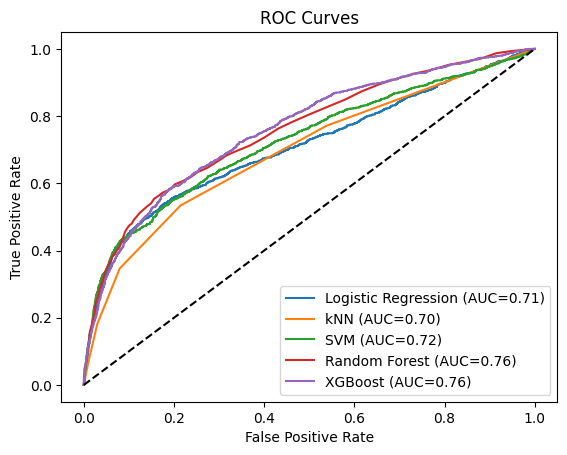

In [10]:
# Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
        results[name] = (acc, auc)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [14]:
# Compare Models
print("\n=== Model Comparison ===")
for name, (acc, auc) in results.items():
    print(f"{name}: Accuracy={acc:.3f}, AUC={auc:.3f}")


=== Model Comparison ===
Logistic Regression: Accuracy=0.808, AUC=0.708
kNN: Accuracy=0.793, AUC=0.696
SVM: Accuracy=0.816, AUC=0.724
Random Forest: Accuracy=0.815, AUC=0.757
XGBoost: Accuracy=0.809, AUC=0.759
